In [1]:
%matplotlib inline
import json
import re
import string
from wordcloud import WordCloud
from CocCocTokenizer import PyTokenizer

In [2]:
#puncs = '[%s]'%string.punctuation
puncs = '[!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [3]:
T = PyTokenizer(load_nontone_data=True)

In [4]:
with open('data.json') as infile:
    data = json.load(infile)

In [5]:
codes = list(data.keys())

In [6]:
corpus = [data[code]['caption'] for code in codes]

In [7]:
with open('vietnamese-stopwords-dash.txt', 'r') as infile:
    stopwords = infile.read().split('\n')[:-1]

In [8]:
stopwords[0], stopwords[-1]

('a_lô', 'ừ_ừ')

In [17]:
wordcloud = WordCloud(background_color="white", max_words=2000, contour_width=3, width=1000, height=860, contour_color='steelblue', stopwords = stopwords)

In [14]:
def clean_data(review):
    review = review.strip()
    review = re.sub('\n', '', review)
    review = re.sub(puncs, '', review)
    review = review.lower()
    hashtags = re.findall(r'#\w+', review)
    review = re.sub(r'#\w+', '', review)
    review = ' '.join([x for x in T.word_tokenize(review, tokenize_option=0) if x not in stopwords])
    return review, hashtags

clean_corpus, hashtags_corpus = zip(*[clean_data(post) for post in corpus])
print(clean_corpus[0])
print(hashtags_corpus[0])

tro sweet tầng 4 166 ngọc_khánh 💵 25000 d 50000 d ❗ ️ pass wifi 166ngockhanhh 📍 tro_khi cơ_sở hàng_bún cơ_sở ngọc_khánh đỡ chú_ý gửi xe đối_diện 5 k nha đi ngõ cạnh 166 lối thang_máy đi tầng 4 quán đầu loay_hoay mãi biển chỉ_dẫn đèn đường hmmm quán không_gian siêu bé gian bánh quán gian cafe xinh_xắn học tầm 4 bàn ghế sofa to bự hợp đi học rủ 1 2 đi may quán yên_tĩnh ô cửa kính to bự view ko đẹp lắm đi ban_ngày sáng_sủa toàn học tối thuii ☕ ️ tro bánh nhật tro nổi_tiếng bánh cuộn takesumi bánh tinh_than tre 30 k bánh màu_sắc nma ngon lắm bánh xốp tơi kem nhẹ gọi kèm trà nhâm_nhi thử magic flan 29 k bánh lớp flan lớp bánh xốp kèm đỡ triffle socola t6t7 chủ_nhật bánh thể gọi triffle phúc_bồn_tử chua_chua bớt giá bánh 30 k thử heavenly cheesecake 42 k japanese cheesecake 40 k bánh tro giá bánh ổn chất_lượng tuyệt_vời cắm chân lâu_dài
['#bemycoffeebadinh', '#liketkit', '#hanoiwander', '#morningcoffee', '#coffeenclothes', '#coffee', '#stylepost', '#simplestyle', '#love', '#hanoianstotravel'

In [15]:
final_corpus = ' '.join(clean_corpus)

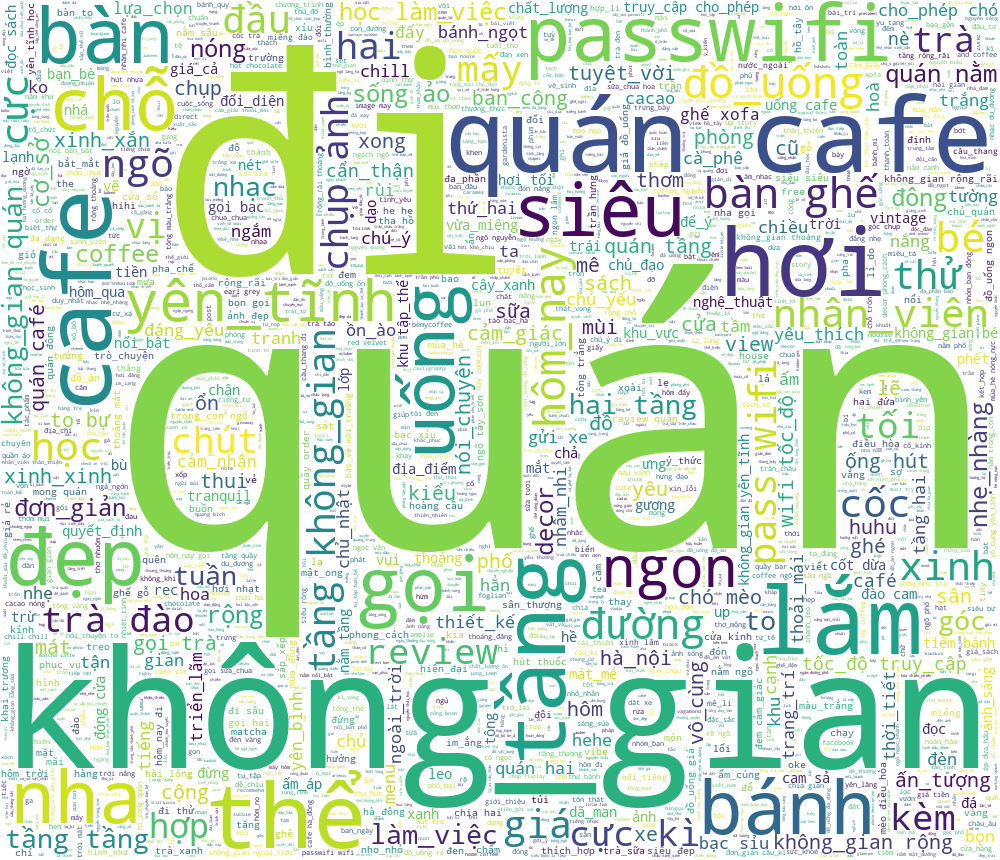

In [18]:
# Generate a word cloud
wordcloud.generate(final_corpus)
# Visualize the word cloud
wordcloud.to_image()

In [18]:
wordcloud.to_file('wordcloud.png')

In [21]:
from collections import Counter
import itertools

In [22]:
Counter(itertools.chain.from_iterable(hashtags_corpus)).most_common()

[('#hanoiwander', 198),
 ('#morningcoffee', 197),
 ('#coffeenclothes', 197),
 ('#coffeemug', 197),
 ('#teaaddict', 197),
 ('#coffeeaddict', 197),
 ('#hanoian', 197),
 ('#coffeeholic', 197),
 ('#hanoicoffee', 197),
 ('#teatime', 197),
 ('#teabreak', 197),
 ('#americano', 197),
 ('#chai', 197),
 ('#happiness', 197),
 ('#liketkit', 196),
 ('#coffee', 196),
 ('#stylepost', 196),
 ('#simplestyle', 196),
 ('#love', 196),
 ('#hanoianstotravel', 196),
 ('#tea', 196),
 ('#time', 196),
 ('#hanoilifestyle', 196),
 ('#mugsofinstagram', 196),
 ('#mug', 196),
 ('#motivasyon', 196),
 ('#yks', 196),
 ('#beverage', 196),
 ('#ourhanoi', 62),
 ('#bemycoffeedongda', 58),
 ('#bemycoffeehoankiem', 46),
 ('#bemycoffeebadinh', 41),
 ('#bemycoffeecaugiay', 23),
 ('#bemycoffeetayho', 16),
 ('#bemycoffeehaibatrung', 14),
 ('#bemycoffeehadong', 13),
 ('#bemycoffeethanhxuan', 8),
 ('#bemycoffeenamtuliem', 5),
 ('#bemydidau', 4),
 ('#nostrawchallenge', 2),
 ('#bemycoffeelongbien', 2),
 ('#hanoi', 1),
 ('#bemyyeumoi

In [24]:
Counter(final_corpus.split(' ')).most_common()

[('quán', 1140),
 ('không_gian', 636),
 ('️', 621),
 ('tầng', 577),
 ('cafe', 488),
 ('d', 451),
 ('đi', 446),
 ('k', 393),
 ('gọi', 287),
 ('hơi', 285),
 ('hai', 266),
 ('bàn', 252),
 ('trà', 247),
 ('📍', 240),
 ('💵', 237),
 ('❗', 224),
 ('lắm', 218),
 ('ngõ', 217),
 ('2', 217),
 ('☕', 212),
 ('đồ_uống', 203),
 ('siêu', 185),
 ('thể', 184),
 ('nằm', 174),
 ('bánh', 172),
 ('đẹp', 172),
 ('1', 168),
 ('yên_tĩnh', 167),
 ('học', 165),
 ('ghế', 163),
 ('cực', 160),
 ('⏰', 157),
 ('⭐', 153),
 ('uống', 153),
 ('ngon', 151),
 ('passwifi', 148),
 ('giá', 145),
 ('nha', 141),
 ('rộng', 141),
 ('hôm_nay', 139),
 ('to', 138),
 ('chỗ', 137),
 ('3', 130),
 ('wifi', 129),
 ('bé', 129),
 ('chụp', 128),
 ('thử', 126),
 ('làm_việc', 126),
 ('ảnh', 125),
 ('đào', 122),
 ('cốc', 116),
 ('xe', 110),
 ('–', 110),
 ('tối', 107),
 ('xinh', 107),
 ('nhân_viên', 104),
 ('đường', 101),
 ('coffee', 101),
 ('cửa', 95),
 ('hôm', 95),
 ('30000', 91),
 ('đông', 91),
 ('nhạc', 89),
 ('50000', 88),
 ('review', 87),
